### Import Library

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib


### Import Data

In [47]:
# Membaca file Excel yang diunggah oleh user
file_path = '../compile/compiled_data_normalized_ver2.xlsx'
data = pd.read_excel(file_path)
data

,Tahun,Persentase Kemiskinan,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
0,2010,13.11,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
1,2011,11.51,34.500000,10.000000,5.500000,7.000000,43.000000,0.000000,0.000000,0.000000
2,2012,10.75,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
3,2013,10.58,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
4,2014,9.87,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
5,2015,10.09,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
6,2016,10.10,25.000000,0.000000,0.000000,0.000000,25.000000,13.250000,11.750000,25.000000
7,2017,9.90,24.271845,0.000000,2.912621,1.213592,23.058252,9.223301,15.048544,24.271845
8,2018,7.94,21.250000,3.750000,0.000000,0.000000,25.000000,14.500000,10.500000,25.000000
9,2019,7.94,18.541667,2.291667,2.291667,0.000000,20.833333,14.375000,20.833333,20.833333


### Split

In [48]:
target = 'Persentase Kemiskinan'
exog_vars = data.columns[2:]  # Semua kolom setelah 'Persentase Kemiskinan'

# Membagi data menjadi training dan testing
train_data = data[data['Tahun'].between(2010, 2021)].drop(columns=['Tahun'])
test_data = data[data['Tahun'].between(2022, 2023)].drop(columns=['Tahun'])

In [49]:
train_data

,Persentase Kemiskinan,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
0,13.11,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
1,11.51,34.500000,10.000000,5.500000,7.000000,43.000000,0.000000,0.000000,0.000000
2,10.75,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
3,10.58,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
4,9.87,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
5,10.09,22.252109,3.202537,1.987781,0.993891,24.375170,14.982903,10.907951,21.297658
6,10.10,25.000000,0.000000,0.000000,0.000000,25.000000,13.250000,11.750000,25.000000
7,9.90,24.271845,0.000000,2.912621,1.213592,23.058252,9.223301,15.048544,24.271845
8,7.94,21.250000,3.750000,0.000000,0.000000,25.000000,14.500000,10.500000,25.000000
9,7.94,18.541667,2.291667,2.291667,0.000000,20.833333,14.375000,20.833333,20.833333


In [50]:
test_data

,Persentase Kemiskinan,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
12,7.9,23.148148,5.092593,2.314815,0.0,23.148148,12.731481,10.416667,23.148148
13,7.3,25.000000,0.000000,0.000000,0.0,25.000000,15.000000,10.000000,25.000000


### Modelling

In [51]:
# Membagi data menjadi fitur (X) dan target (y)
X_train = train_data[exog_vars]
y_train = train_data[target]
X_test = test_data[exog_vars]
y_test = test_data[target]


In [52]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective='reg:squarederror')
}

param_grid = {
    "Random Forest": {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45]
    },
    "Gradient Boosting": {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
        'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    }
}

In [53]:
# Langkah 1: Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Langkah 2: Melakukan PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [54]:
joblib.dump(scaler, 'scaler.pkl')

joblib.dump(pca, 'pca.pkl')

['pca.pkl']

In [55]:

eigenvalues = pca.explained_variance_
eigenvalues

array([6.69941439e+00, 1.09051642e+00, 6.93379186e-01, 1.98210072e-01,
       3.96455158e-02, 6.10622025e-03, 9.28345613e-07, 6.14236394e-34])

In [56]:

pcs_above_one = [i+1 for i, eigenvalue in enumerate(eigenvalues) if eigenvalue > 1]


eigenvalues, pcs_above_one

(array([6.69941439e+00, 1.09051642e+00, 6.93379186e-01, 1.98210072e-01,
        3.96455158e-02, 6.10622025e-03, 9.28345613e-07, 6.14236394e-34]),
 [1, 2])

Running

In [57]:
# Langkah 1: Transformasikan data X_train dan X_test berdasarkan PC yang dipilih
X_train_pca = X_pca[:, pcs_above_one]
X_test_pca = pca.transform(X_test)[:, pcs_above_one]

# Langkah 2: Loop untuk melakukan hyperparameter tuning pada setiap model dengan data hasil PCA
best_models = {}
model_results = {}

for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)
    grid_search.fit(X_train_pca, y_train)
    best_models[name] = grid_search.best_estimator_
    y_pred = best_models[name].predict(X_test_pca)
    model_results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAPE": mean_absolute_percentage_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Best Params": grid_search.best_params_
    }

c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [58]:
best_models

{'Random Forest': RandomForestRegressor(random_state=42),
 'Gradient Boosting': GradientBoostingRegressor(learning_rate=0.3, n_estimators=150, random_state=42),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}

### Model Terbaik

In [59]:
# Forecasting untuk tahun 2024
forecast_2024 = data[data['Tahun'] == 2024].copy()  # Mengambil data tahun 2024 untuk digunakan sebagai prediktor (eksogen variabel)
forecast_2024['Tahun'] = 2024
forecast_2024[target] = None  # Kolom target kosong karena ini yang akan kita prediksi

In [60]:
forecast_2024[exog_vars]

,Biaya kuliah,Biaya listrik,Biaya rumah sakit,Medical check up,Paket Internet,Biaya sekolah,Harga bensin,Jual rumah
14,18.223235,5.46697,3.189066,4.783599,22.779043,15.94533,6.833713,22.779043


In [61]:
# Asumsikan forecast_2024 sudah diisi dengan query data eksogen 2024

# Langkah 1: Standarisasi data eksogen 2024
forecast_2024_scaled = scaler.transform(forecast_2024[exog_vars])

# Langkah 2: Transformasi data eksogen 2024 menggunakan PCA
forecast_2024_pca = pca.transform(forecast_2024_scaled)[:, pcs_above_one]

# Langkah 3: Lakukan prediksi menggunakan model terbaik berdasarkan MAE
best_model_name = min(model_results, key=lambda k: model_results[k]["MAE"])
best_model = best_models[best_model_name]


In [62]:
forecast_2024['Persentase Kemiskinan'] = best_model.predict(forecast_2024_pca)

# Menampilkan hasil prediksi untuk tahun 2024
forecast_2024[['Tahun', 'Persentase Kemiskinan']]

,Tahun,Persentase Kemiskinan
14,2024,8.084947


In [63]:
# Menampilkan hasil evaluasi model dan prediksi untuk tahun 2024
model_results, forecast_2024[['Tahun', 'Persentase Kemiskinan']]

({'Random Forest': {'MAE': 2.403160000000003,
   'RMSE': 2.421812954296845,
   'MAPE': 0.31825933761054315,
   'R2': -64.16864428444447,
   'Best Params': {'max_depth': None, 'n_estimators': 100}},
  'Gradient Boosting': {'MAE': 2.4999999999175606,
   'RMSE': 2.517935662320982,
   'MAPE': 0.3310213282360579,
   'R2': -69.44444443986436,
   'Best Params': {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 150}},
  'XGBoost': {'MAE': 2.337175750732422,
   'RMSE': 2.3563510964649685,
   'MAPE': 0.3095636501745519,
   'R2': -60.693227664573875,
   'Best Params': {'learning_rate': 0.01,
    'max_depth': 4,
    'n_estimators': 500}}},
     Tahun  Persentase Kemiskinan
 14   2024               8.084947)

### Plot Forecasting

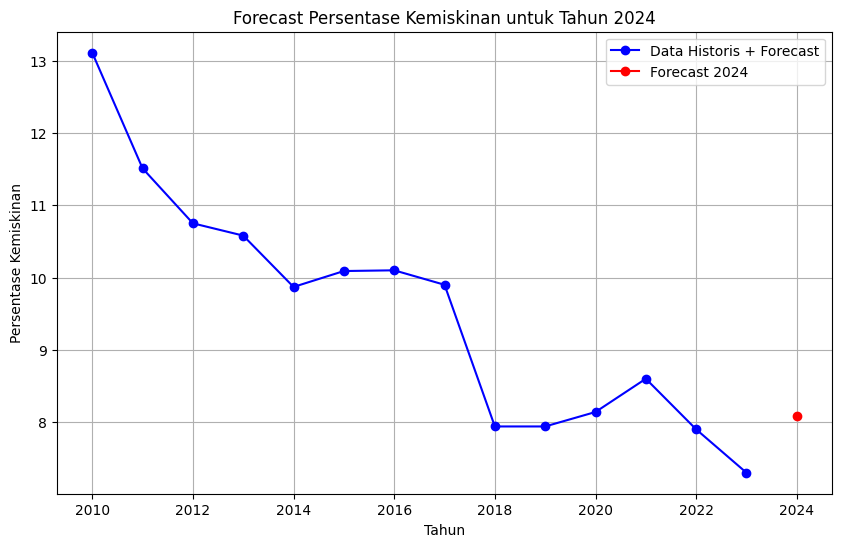

In [64]:
# Menggabungkan data asli dan data forecasting untuk plot
historical_data = data[['Tahun', 'Persentase Kemiskinan']]
forecast_2024_data = forecast_2024[['Tahun', 'Persentase Kemiskinan']]

# Gabungkan data historis dan hasil forecast
combined_data = pd.concat([historical_data, forecast_2024_data])

# Plot data historis dan hasil forecast sebagai satu garis yang tersambung
plt.figure(figsize=(10, 6))
plt.plot(historical_data['Tahun'], historical_data['Persentase Kemiskinan'], marker='o', color='blue', label='Data Historis + Forecast')
plt.plot(forecast_2024_data['Tahun'], forecast_2024_data['Persentase Kemiskinan'], marker='o', color='red', label='Forecast 2024')

# Menambahkan judul dan label
plt.title('Forecast Persentase Kemiskinan untuk Tahun 2024')
plt.xlabel('Tahun')
plt.ylabel('Persentase Kemiskinan')
plt.legend()
plt.grid(True)
plt.show()

### Hasil Setiap Model

In [65]:
# Dictionary untuk menyimpan hasil forecast dari setiap model
forecast_results = {}

# Langkah 1: Standarisasi data eksogen 2024
forecast_2024_scaled = scaler.transform(forecast_2024[exog_vars])

# Langkah 2: Transformasi data eksogen 2024 menggunakan PCA
forecast_2024_pca = pca.transform(forecast_2024_scaled)[:, pcs_above_one]

# Langkah 3: Melakukan forecast untuk tahun 2024 menggunakan setiap model yang sudah di-tuning
for name, model in best_models.items():
    forecast_2024[target] = model.predict(forecast_2024_pca)
    forecast_results[name] = forecast_2024[target].values[0]  # Simpan hasil prediksi untuk tahun 2024

# Tampilkan hasil forecasting dari setiap model
for model_name, forecast_value in forecast_results.items():
    print(f"Forecast 'Persentase Kemiskinan' tahun 2024 oleh {model_name}: {forecast_value:.4f}")


Forecast 'Persentase Kemiskinan' tahun 2024 oleh Random Forest: 8.7426
Forecast 'Persentase Kemiskinan' tahun 2024 oleh Gradient Boosting: 8.2808
Forecast 'Persentase Kemiskinan' tahun 2024 oleh XGBoost: 8.0849


### Menyimpan Model

In [66]:
import joblib

# Simpan model terbaik dari setiap metode
for name, model in best_models.items():
    filename = f'{name}_model.pkl'
    joblib.dump(model, filename)
    print(f'Model {name} berhasil disimpan sebagai {filename}')


Model Random Forest berhasil disimpan sebagai Random Forest_model.pkl
Model Gradient Boosting berhasil disimpan sebagai Gradient Boosting_model.pkl
Model XGBoost berhasil disimpan sebagai XGBoost_model.pkl


#### Input Query

In [67]:
# Load the necessary files (scaler, PCA, and trained models)
scaler = joblib.load('scaler.pkl')
pca = joblib.load('pca.pkl')
best_models = {
    'Random Forest': joblib.load('Random Forest_model.pkl'),
    'Gradient Boosting': joblib.load('Gradient Boosting_model.pkl'),
    'XGBoost': joblib.load('XGBoost_model.pkl'),
}

In [88]:

# Function to perform forecasting based on new input data
def forecast_poverty_percentage(new_input):
    # Step 1: Standardize the new exogenous input data
    new_input_scaled = scaler.transform([new_input])

    # Step 2: Transform the standardized data using PCA
    new_input_pca = pca.transform(new_input_scaled)[:, pcs_above_one]

    # Step 3: Perform forecasting for the new input data using each of the tuned models
    forecast_results = {}
    for name, model in best_models.items():
        forecast_value = model.predict(new_input_pca)
        forecast_results[name] = forecast_value[0]  # Store the forecasted value

    return forecast_results

In [90]:
# Example input data for 2024 (as an array or list)
import random

new_input_2025 = [random.randint(1, 100) for _ in range(8)]

query = [18.22, 5.47, 3.19, 4.78, 22.78, 15.95, 6.83, 22.78]
# Replace with the actual values for exogenous variables

exog_vars = [
    'Biaya kuliah',
    'Biaya listrik',
    'Biaya rumah sakit',
    'Medical check up',
    'Paket Internet',
    'Biaya sekolah',
    'Harga bensin',
    'Jual rumah'
]

# Target variable to be predicted
target = 'Persentase Kemiskinan'

# Perform forecasting for the new input data
forecast_2025 = forecast_poverty_percentage(query)

# Display the forecast results
for model_name, forecast_value in forecast_2025.items():
    print(f"Forecast 'Persentase Kemiskinan' for 2025 by {model_name}: {forecast_value:.4f}")

Forecast 'Persentase Kemiskinan' for 2025 by Random Forest: 8.7426
Forecast 'Persentase Kemiskinan' for 2025 by Gradient Boosting: 8.2808
Forecast 'Persentase Kemiskinan' for 2025 by XGBoost: 8.0849


c:\Users\fezaa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model Machine Learning Gak Bisa Tanpa Variabel Eksogen